In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [56]:
del model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
#model.add(layers.Conv2D(56, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(56, (3, 3), activation='relu'))

In [57]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2704)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               346240    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                     

In [58]:
#model.add(layers.Flatten())
#model.add(layers.Dense(56, activation='relu'))
#model.add(layers.Dense(10))

In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2347 - accuracy: 0.9295 - val_loss: 0.0887 - val_accuracy: 0.9741
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0899 - accuracy: 0.9730 - val_loss: 0.0543 - val_accuracy: 0.9825
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0601 - accuracy: 0.9811 - val_loss: 0.0464 - val_accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0463 - accuracy: 0.9852 - val_loss: 0.0467 - val_accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0362 - accuracy: 0.9888 - val_loss: 0.0429 - val_accuracy: 0.9868


In [61]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

313/313 - 1s - loss: 0.0429 - accuracy: 0.9868 - 568ms/epoch - 2ms/step


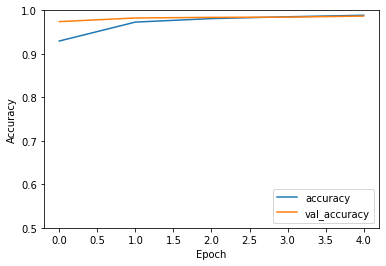

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [63]:
print(test_acc)

0.9868000149726868


In [64]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[8.30602964e-09, 1.33927173e-07, 5.42159633e-08, 5.00188094e-07,
        3.17031568e-10, 6.36035391e-10, 8.36268338e-13, 9.99999046e-01,
        9.42164124e-10, 1.93741997e-07],
       [4.25967937e-06, 1.26957457e-04, 9.99868512e-01, 3.08005621e-09,
        7.10579789e-11, 1.55224930e-11, 1.99004333e-07, 5.50698983e-12,
        2.26547536e-09, 9.98046047e-14],
       [1.94471511e-07, 9.99932170e-01, 3.41288433e-06, 2.51142271e-08,
        3.55849552e-05, 5.14733188e-07, 2.05153356e-06, 1.89843267e-05,
        7.05744560e-06, 1.43590825e-07],
       [9.99993324e-01, 1.34657285e-11, 5.70513794e-06, 2.52850385e-09,
        1.85924349e-11, 2.91622992e-09, 1.12470687e-07, 4.98342523e-09,
        2.94459312e-07, 5.42039459e-07],
       [3.27418519e-08, 7.19701774e-08, 5.62435112e-08, 6.66721611e-09,
        9.99488711e-01, 1.14703496e-07, 3.32575678e-09, 1.84864575e-07,
        3.41345526e-07, 5.10605460e-04]], dtype=float32)>

In [65]:
print(y_test[:5])

[7 2 1 0 4]


In [66]:
!mkdir -p saved_modelc
probability_model.save('saved_modelc/myfirstcnn3')

INFO:tensorflow:Assets written to: saved_modelc/myfirstcnn3/assets


INFO:tensorflow:Assets written to: saved_modelc/myfirstcnn3/assets


In [67]:
from PIL import Image
import numpy as np
im = np.array(Image.open("/home/okawa/Microchip/VBX/SDK/VectorBlox-SDK-release-v1.4.1/tutorials/test_images/seven.28.jpg"))

In [68]:
probability_model(im.reshape(1,28,28)/255.0)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.1218588e-08, 1.5511675e-07, 6.9573254e-08, 5.8752539e-07,
        3.8408185e-10, 6.9700296e-10, 1.1120927e-12, 9.9999893e-01,
        1.3860448e-09, 2.3694699e-07]], dtype=float32)>

In [69]:
im0 = Image.open("/home/okawa/Microchip/VBX/SDK/VectorBlox-SDK-release-v1.3.1/tutorials/tensorflow2/mnist_trial/test_data/0/test0071.png")
im1 = np.array(im0.resize((28,28)))
probability_model(im1.reshape(1,28,28)/255.0)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[9.9999559e-01, 2.6574204e-14, 2.8042866e-06, 2.8690566e-11,
        1.7490869e-13, 2.9396932e-12, 9.8310702e-09, 6.8376976e-10,
        2.9174066e-08, 1.5131510e-06]], dtype=float32)>

In [70]:
im0 = Image.open("/home/okawa/Microchip/VBX/SDK/VectorBlox-SDK-release-v1.3.1/tutorials/tensorflow2/mnist_trial/test_data/2/test0035.png")
im1 = np.array(im0.resize((28,28)))
probability_model(im1.reshape(1,28,28)/255.0)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[6.3268708e-08, 1.0629886e-05, 9.9997449e-01, 1.3437709e-06,
        9.8127704e-12, 8.2621643e-10, 9.0264829e-10, 1.3309743e-05,
        1.5582181e-07, 2.1643372e-09]], dtype=float32)>